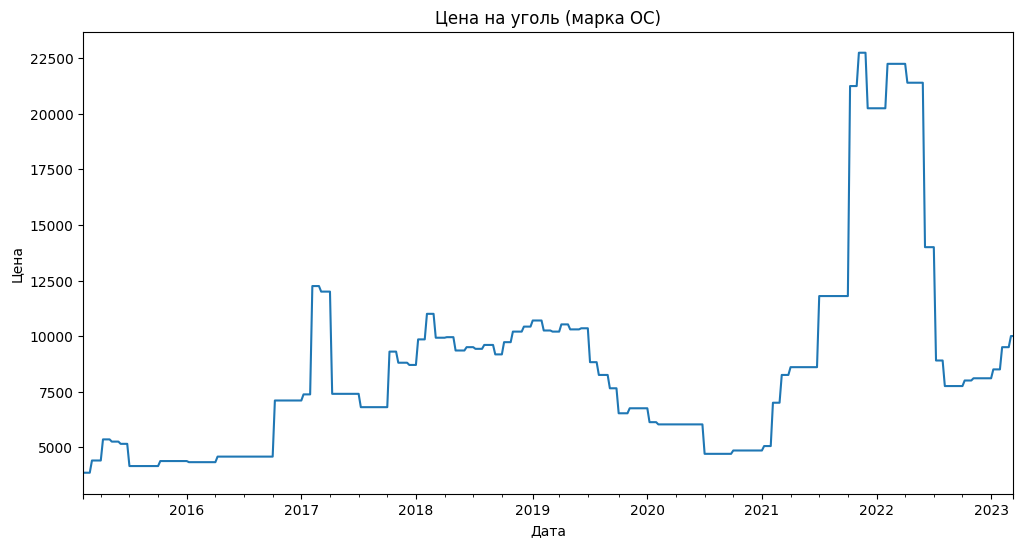

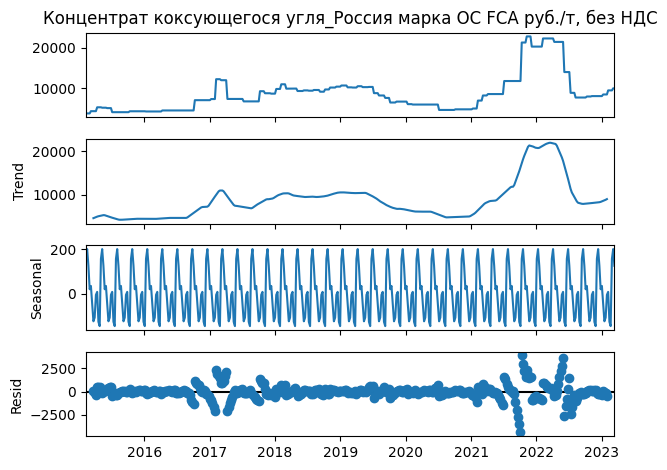

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

data = pd.read_csv('merged_df_cleaned.csv', parse_dates=['dt'], index_col='dt')

data['Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС'].plot(figsize=(12, 6))
plt.title('Цена на уголь (марка ОС)')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.show()

result = seasonal_decompose(data['Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС'], model='additive', period=12)
result.plot()
plt.show()

def check_stationarity(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    if result[1] <= 0.05:
        print("Ряд стационарен")
    else:
        print("Ряд нестационарен")



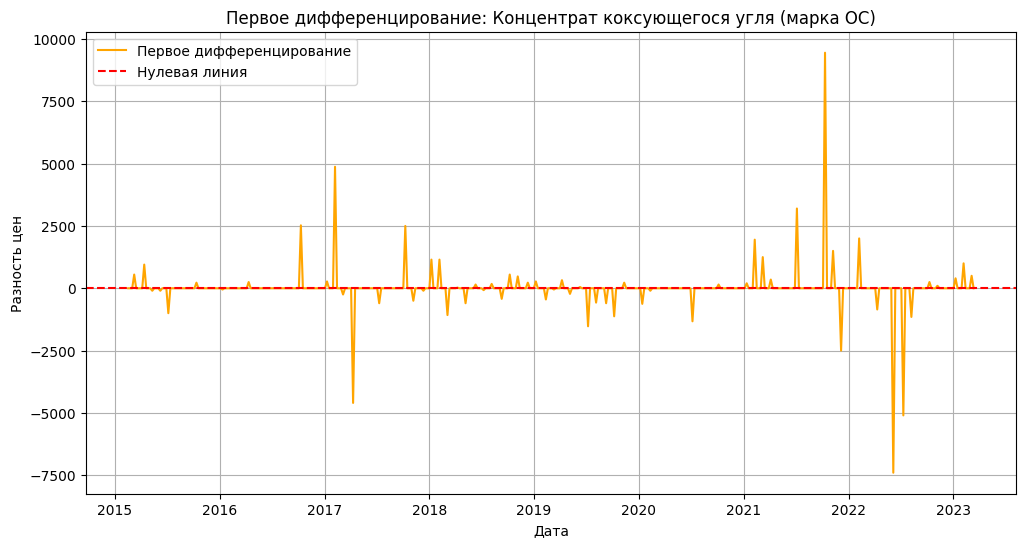

Результаты теста Дики-Фуллера для исходного:
ADF Statistic: -2.572576777760956
p-value: 0.09879857451473667
Critical Values: {'1%': np.float64(-3.446479704252724), '5%': np.float64(-2.8686500930967354), '10%': np.float64(-2.5705574627547096)}
Ряд нестационарен
---


In [ ]:

# Первое дифференцирование (удаление тренда)
diff_series = series.diff().dropna()

# Визуализация первого дифференцирования
plt.figure(figsize=(12, 6))# Автоматический подбор параметров (p,d,q)
model = auto_arima(ts,
                   seasonal=True,
                   m=12,               # Месячная сезонность
                   stepwise=True,
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True)

print(model.summary())
plt.plot(diff_series, label='Первое дифференцирование', color='orange')
plt.title('Первое дифференцирование: Концентрат коксующегося угля (марка ОС)')
plt.xlabel('Дата')
plt.ylabel('Разность цен')
plt.axhline(0, color='red', linestyle='--', label='Нулевая линия')
plt.legend()
plt.grid(True)
plt.show()

# Проверка стационарности исходного ряда
def check_stationarity(series, title):
    result = adfuller(series)
    print(f'Результаты теста Дики-Фуллера для {title}:')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    if result[1] <= 0.05:
        print("Ряд стационарен")
    else:
        print("Ряд нестационарен")
    print('---')

# Проверка стационарности исходного ряда
check_stationarity(series, 'исходного')

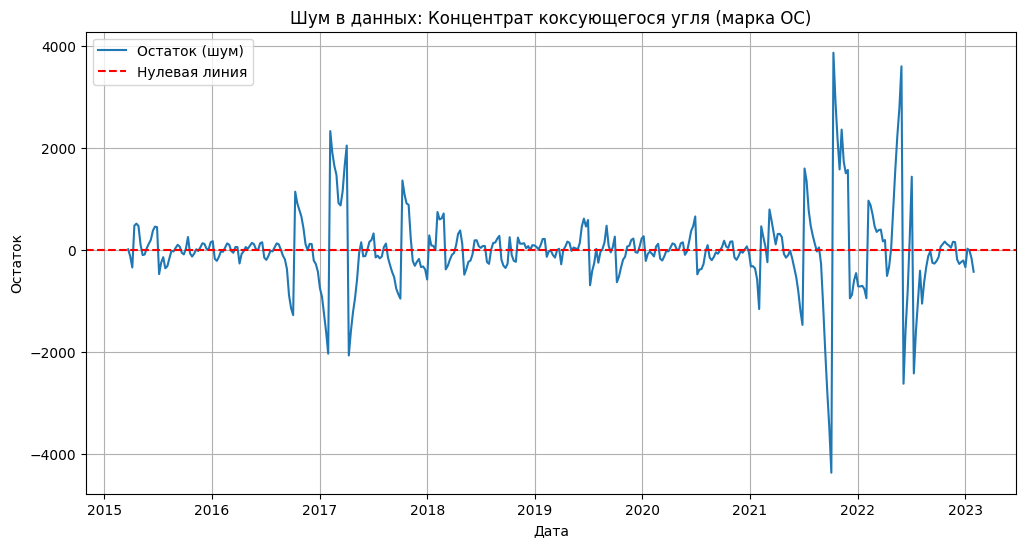

In [ ]:


series = data['Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС']

result = seasonal_decompose(series, model='additive', period=12)  # period=12 для месячных данных

plt.figure(figsize=(12, 6))
plt.plot(result.resid, label='Остаток (шум)')
plt.title('Шум в данных: Концентрат коксующегося угля (марка ОС)')
plt.xlabel('Дата')
plt.ylabel('Остаток')
plt.axhline(0, color='red', linestyle='--', label='Нулевая линия')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Установка нужных версий библиоте
# !pip uninstall -y numpy scikit-learn
# !pip install --upgrade pip setuptools wheel
# !pip install numpy==1.23.5 scikit-learn==1.3.0

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# 🔹 Загрузка данных
df = pd.read_csv('merged_df_cleaned.csv', parse_dates=['dt'], index_col='dt')
df = df.asfreq('D')

# 🔹 Очистка данных
df = df.fillna(method='ffill')  # Заполняем пропуски
df = df.replace([np.inf, -np.inf], np.nan)  # Убираем бесконечные значения
df = df.dropna()  # Убираем оставшиеся NaN

# 🔹 Создание признаков
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year
df['dayofweek'] = df.index.dayofweek

X = df[['day', 'month', 'year', 'dayofweek']]
y = df['Price']

# 🔹 Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 🔹 Обучение модели XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model.fit(X_train, y_train)

# 🔹 Прогноз
forecast = xgb_model.predict(X_test)

# 🔹 Оценка точности
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, forecast)
print(f'MAE: {mae:.2f} руб.')




MAE: 17622.58 руб.


<ipython-input-4-c2f4816245ea>:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Заполняем пропуски


Итоговый вывод:
Сезонность: В данных присутствует сезонность, которая проявляется в виде регулярных колебаний с периодичностью 12 месяцев. Это важно учитывать при прогнозировании, так как сезонные изменения могут существенно влиять на динамику цен.

Тренд: Наблюдается выраженный тренд, который отражает долгосрочные изменения в ценах на уголь. Тренд может быть связан с макроэкономическими факторами, такими как спрос, предложение или изменения в издержках производства.

Стационарность: Ряд нестационарен, что требует применения методов для его стабилизации (например, дифференцирование). Это необходимо для корректного использования статистических моделей, таких как ARIMA.

Шум: Шум в данных является случайным, что подтверждает адекватность модели разложения. Однако, если в остатке наблюдаются аномалии, это может указывать на необходимость уточнения модели или учета дополнительных факторов.